# Assignment 2
## Problem 1

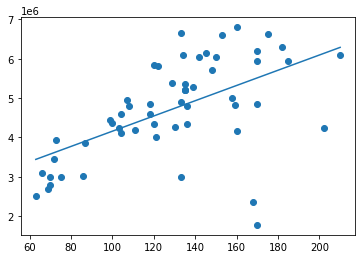

In [81]:
import numpy as np #load all libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import sys
import seaborn


df = pd.read_csv('hemnet.csv')

df = df[["Living_area","Selling_price"]] # extract relevant columns

#cleaaning of outliers goes here

x = np.array(df['Living_area'])
y = np.array(df['Selling_price'])

model = LinearRegression()
model.fit(x[:,np.newaxis],y)

k = model.coef_ 
k = k[0]
m = model.intercept_

xfit = np.linspace(np.min(x),np.max(x))
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.show()
#model without cleaning

In [79]:
values = [] #house prices for 100, 150 and 200 m2

for i in range(0,3):
    value = (100+50*i)*k+m
    values.append(value)
    
print(values)

[4157617.0980890263, 5126124.025455605, 6094630.952822184]
